# Running regression end to end

This tutorial aims to train students about regression and machine learning in general, from end-to-end, and to encourage best practices

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
# !pip install matplotlib

## 1. Load Data

- Is about data engineer job
- You work with legacy database
- Most of the time, you will work with AWS / Azure

In [2]:
#load json, csv, mysql
df = pd.read_csv("../data/Life_Expectancy_Data.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
type(df.GDP)
#Series - one dimensional table

pandas.core.series.Series

In [5]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
developing_country = df.Status == "Developing"
adult_mortality    = df['Adult Mortality'] > 265

In [7]:
df_chaky = df[developing_country & adult_mortality]

In [8]:
df_chaky.shape

(553, 22)

## 2. EDA

- Understand your data
- Spend 70% of your time here
- But today, I will do so quickly...but it should not be like this....

### 2.1 Renaming

In [9]:
df.rename(columns = {'Country':'country', 
                     'Year':'year', 
                     'Status':'status', 
                     'Life expectancy ':'life-exp', 
                     'Adult Mortality':'adult-mort',
                     'infant deaths':'infant-deaths', 
                     'Alcohol':'alcohol', 
                     'percentage expenditure':'per-exp', 
                     'Hepatitis B':'hepa',
                     'Measles ':'measles', 
                     ' BMI ':'bmi', 
                     'under-five deaths ':'under-five-deaths', 
                     'Polio':'polio', 
                     'Total expenditure':'total-exp',
                     'Diphtheria ':'dip', 
                     ' HIV/AIDS':'hiv', 
                     'GDP':'gdp', 
                     'Population':'pop',
                     ' thinness  1-19 years':'thin1-19', 
                     ' thinness 5-9 years':'thin5-9',
                     'Income composition of resources':'income', 
                     'Schooling':'school'}, inplace = True)

### 2.2 Univariate Analysis
- Any visualization that focuses on single variable
- Countplot and distribution plot (histogram)
- Countplot - categorical variable
- Distribution - continuous variable

In [10]:
#what you would do in real world
#is to think - and to come with hypothesis and try to confirm with visualization
# sns.countplot(data = df, x = 'status')  #my data is biased towards develping country

#task 1:  try to do with country
#sns.countplot(data = df, x = 'country')

#task 2:  look at status, but with income > 0.5
# df_income_more = df.income > 0.5
# sns.countplot(data = df_income_more, x = 'income')

In [11]:
df.columns

Index(['country', 'year', 'status', 'life-exp', 'adult-mort', 'infant-deaths',
       'alcohol', 'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths',
       'polio', 'total-exp', 'dip', 'hiv', 'gdp', 'pop', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

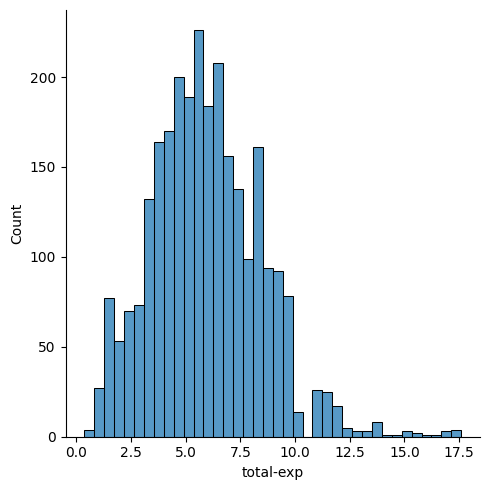

In [12]:
sns.displot(data = df, x = 'total-exp')
#task 1 = try with life-exp
#sns.displot(data = df, x = 'life-exp')

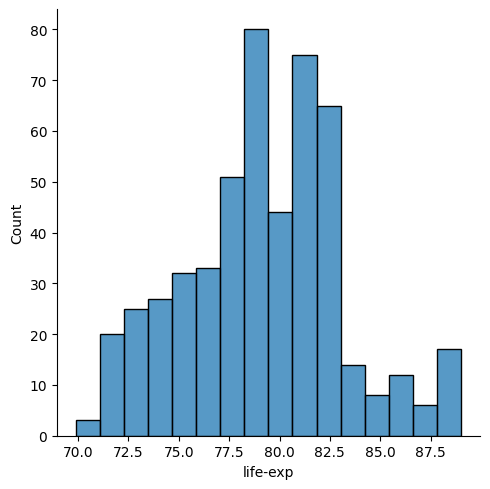

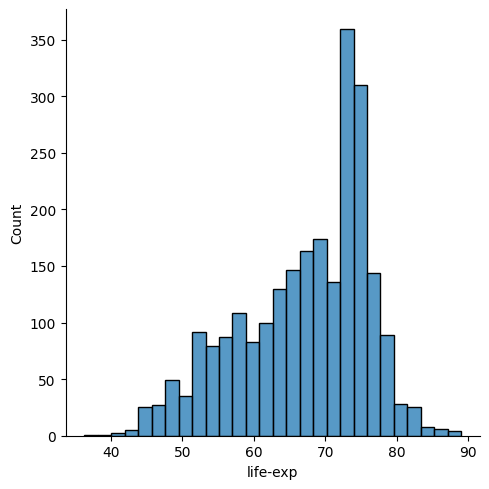

In [13]:
#task 2 = try with life-exp, with status == "Developed" and compared with status == "Developing"
df_developed = df['status'] == 'Developed'
df_developing = df['status'] == 'Developing'
sns.displot(data = df[df_developed], x = 'life-exp')
sns.displot(data = df[df_developing], x = 'life-exp')

In [14]:
##countplot - cat var
##displot - cont var

### 2.3 Multivariate Analysis
- Any visualization that focuses on multiple variables
- Boxplot, scatterplot, correlation plot, predictive power score

In [15]:
df.columns

Index(['country', 'year', 'status', 'life-exp', 'adult-mort', 'infant-deaths',
       'alcohol', 'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths',
       'polio', 'total-exp', 'dip', 'hiv', 'gdp', 'pop', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

<Axes: xlabel='status', ylabel='alcohol'>

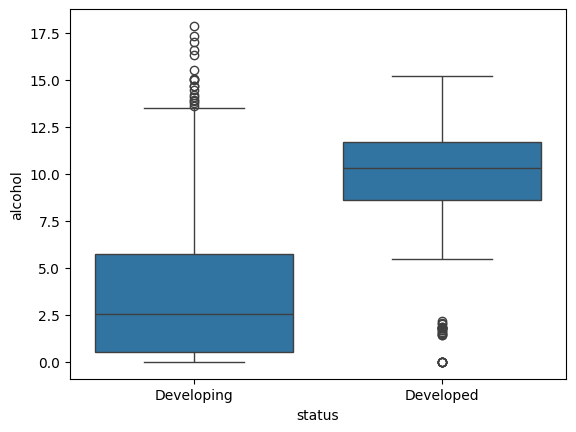

In [16]:
#boxplot - mostly one categorical vs. one continuous\
#cat var = either country or status
#cont var = rest
# sns.boxplot(x = cat var,  y = cont var)
sns.boxplot(x = df['status'], y = df['alcohol'])

#try one more for me

In [17]:
df.columns

Index(['country', 'year', 'status', 'life-exp', 'adult-mort', 'infant-deaths',
       'alcohol', 'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths',
       'polio', 'total-exp', 'dip', 'hiv', 'gdp', 'pop', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

<Axes: xlabel='school', ylabel='life-exp'>

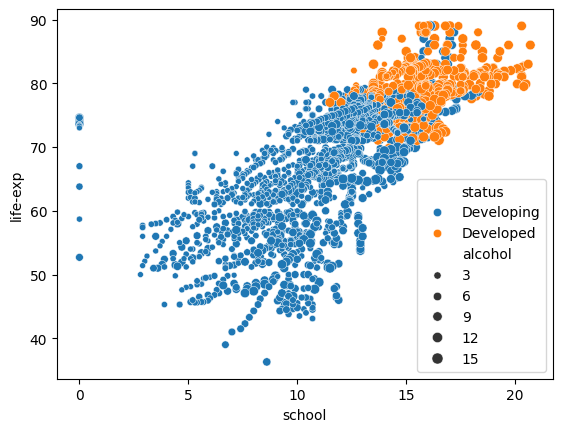

In [18]:
#scatterplot -  three continuous variables - x, y, size + one cat var (hue)
# sns.scatterplot(x = cont var,  y = cont var, hue = cat var, size = cont var)
sns.scatterplot(x = df['school'], y = df['life-exp'], hue = df['status'], size=df['alcohol'])

#try one more for yourself

In [19]:
df.columns

Index(['country', 'year', 'status', 'life-exp', 'adult-mort', 'infant-deaths',
       'alcohol', 'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths',
       'polio', 'total-exp', 'dip', 'hiv', 'gdp', 'pop', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

In [20]:
#correplot - mostly two continuous
df_no_country = df.drop('country', axis='columns')

In [21]:
df_no_country.columns

Index(['year', 'status', 'life-exp', 'adult-mort', 'infant-deaths', 'alcohol',
       'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths', 'polio',
       'total-exp', 'dip', 'hiv', 'gdp', 'pop', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

In [22]:
#label encoding
#because my status is only two categories, so i just convert them to 0 and 1
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_no_country['status'] = le.fit_transform(df_no_country['status'])
df_no_country['status'].unique()

array([1, 0])

In [23]:
df_no_country['status'].value_counts() #developing = 2426, and #developed is 512

status
1    2426
0     512
Name: count, dtype: int64

In [24]:
df_no_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               2938 non-null   int64  
 1   status             2938 non-null   int64  
 2   life-exp           2928 non-null   float64
 3   adult-mort         2928 non-null   float64
 4   infant-deaths      2938 non-null   int64  
 5   alcohol            2744 non-null   float64
 6   per-exp            2938 non-null   float64
 7   hepa               2385 non-null   float64
 8   measles            2938 non-null   int64  
 9   bmi                2904 non-null   float64
 10  under-five-deaths  2938 non-null   int64  
 11  polio              2919 non-null   float64
 12  total-exp          2712 non-null   float64
 13  dip                2919 non-null   float64
 14  hiv                2938 non-null   float64
 15  gdp                2490 non-null   float64
 16  pop                2286 

<Axes: >

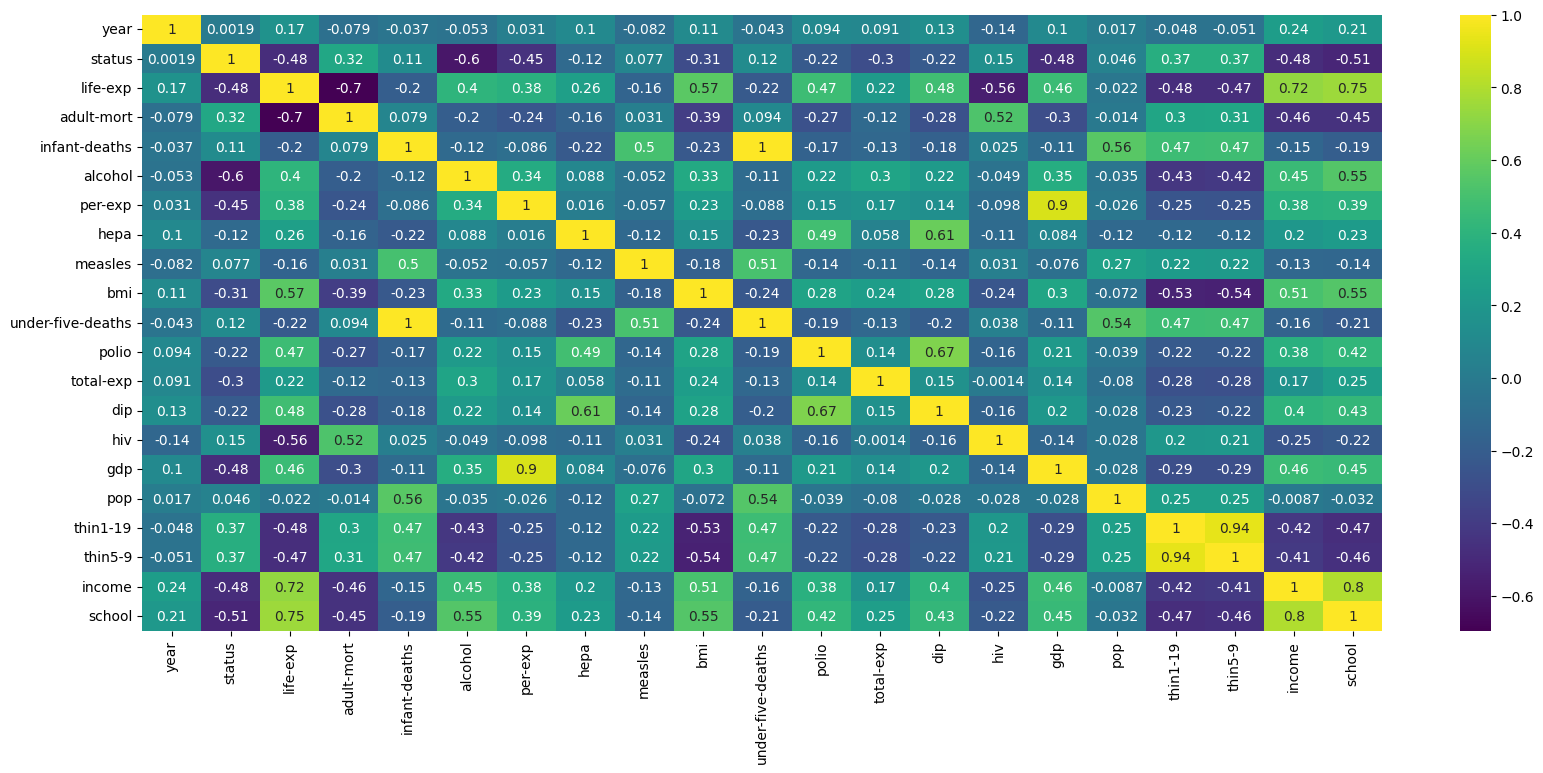

In [25]:
plt.figure(figsize=(20, 8))
sns.heatmap(df_no_country.corr(), annot=True, cmap='viridis')

## 3. Feature Engineering

- Create new features based on existing features
- Future I will teach you about dimensionality reduction

## 4. Feature Selection

- Select salient features X

In [26]:
df_no_country.columns

Index(['year', 'status', 'life-exp', 'adult-mort', 'infant-deaths', 'alcohol',
       'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths', 'polio',
       'total-exp', 'dip', 'hiv', 'gdp', 'pop', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

In [27]:
#based on our above correlation tables, and let's assume we did a lot of EDA
#income, adult mort (not true!)

X = df_no_country[ ['income', 'adult-mort']   ] #we need brackets because sklearn wants 2D for X
y = df_no_country['life-exp']  #sklearn expects 1D from y

In [28]:
from sklearn.model_selection import train_test_split

#test_size can be 0.1 - 0.3 depending on the number of samples you have
#Rules of thumb:  you want to use almost all your data for training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
X_train.shape[0]  #number of samples in X_train
X_train.shape[1]  #number of features in X_train

2

In [30]:
#task:  X_test
X_test.shape[0]  #number of samples in X_test
X_test.shape[1]  #number of features in X_test

2

## 5. Preprocessing

- Imputation
- Scaling

### 5.1 Imputation

In [31]:
#splitting > imputation > scaling
X_train.isna().sum()
#income missing 116 / 2056 is not so much so it's ok
#adult-mort missing 6 / 20256 is not so much so it's ok

income        116
adult-mort      6
dtype: int64

In [32]:
X_test.isna().sum()
#income missing 51 / 882 is not so much so it's ok
#adult-mort missing 4 / 882 is not so much so it's okes

income        51
adult-mort     4
dtype: int64

In [33]:
y_train.isna().sum()

np.int64(6)

In [34]:
y_test.isna().sum()

np.int64(4)

In [35]:
X_train.income.median(), X_train.income.mean()

(np.float64(0.678), np.float64(0.6271180412371133))

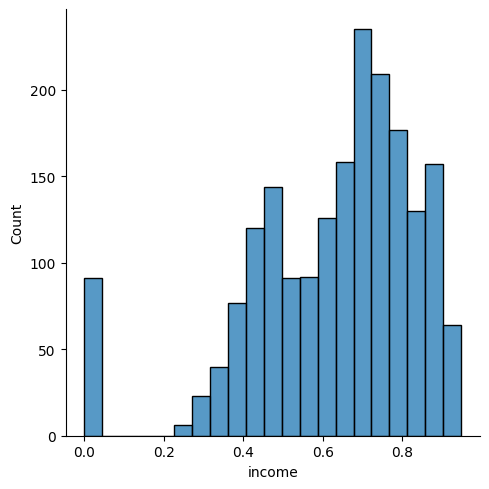

In [36]:
#fill in income
#income is continuous variable - mean, median, regression, zero
sns.displot(data = X_train, x='income')

In [37]:
X_train['income'].fillna(X_train['income'].median(), inplace=True)
X_test['income'].fillna(X_train['income'].median(), inplace=True)
#we fill the test set with training distribution, to avoid any difference in training and test set

/var/folders/1v/1h7r513n71j7569x87spb4b40000gn/T/ipykernel_88747/2872548513.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['income'].fillna(X_train['income'].median(), inplace=True)
/var/folders/1v/1h7r513n71j7569x87spb4b40000gn/T/ipykernel_88747/2872548513.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

In [38]:
X_train['adult-mort'].fillna(X_train['adult-mort'].median(), inplace=True)
X_test['adult-mort'].fillna(X_train['adult-mort'].median(), inplace=True)
#we fill the test set with training distribution, to avoid any difference in training and test set

/var/folders/1v/1h7r513n71j7569x87spb4b40000gn/T/ipykernel_88747/3576955230.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['adult-mort'].fillna(X_train['adult-mort'].median(), inplace=True)
/var/folders/1v/1h7r513n71j7569x87spb4b40000gn/T/ipykernel_88747/3576955230.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

In [39]:
X_train.isna().sum()

income        0
adult-mort    0
dtype: int64

In [40]:
X_test.isna().sum()

income        0
adult-mort    0
dtype: int64

In [41]:
y_train.isna().sum()

np.int64(6)

In [42]:
y_train_rows_with_na = y_train.isna()

In [46]:
# X_train[y_train_rows_with_na]
#task: please delete these rows
X_train = X_train[~y_train_rows_with_na]

In [47]:
y_train = y_train[~y_train_rows_with_na]
#task: delete these rows

In [48]:
y_train.isna().sum()

np.int64(0)

In [49]:
y_test.isna().sum()

np.int64(4)

In [50]:
#remove missing value in y_test
#also removing corresponding X_test

y_test_rows_with_na = y_test.isna()

In [52]:
X_test = X_test[~y_test_rows_with_na]

In [53]:
y_test = y_test[~y_test_rows_with_na]

In [54]:
y_test.isna().sum()

np.int64(0)

### 5.2 Scaling

Scaling makes convergence faster, but not improve accuracy.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#which one to use?
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train) #fits here mean using X_train statistics
X_test = scaler.transform(X_test) #using X_train statistics

## 6. Modeling

- Compare all regression models using cross validation
- Once you got the best model, do cross validation on only one model with different parameters "Grid search"

In [ ]:
##un-prefered way
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#in sklearn, there's only three steps

#1.  create the algorithm
lr = LinearRegression()

#2. fit
lr.fit(X_train, y_train)

#3. predict
yhat = lr.predict(X_test)

In [66]:
print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  27.764971363391236
r2:  0.692213557322754


### 6.1 cross-validation

In [67]:
## preferred way - cross-validation
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor()]

algorithms_names = ["Linear Regression", "Support Vector", "KNN", "DT", "RT"]

In [68]:
algorithms

[LinearRegression(),
 SVR(),
 KNeighborsRegressor(),
 DecisionTreeRegressor(),
 RandomForestRegressor()]

In [69]:
algorithms_names

['Linear Regression', 'Support Vector', 'KNN', 'DT', 'RT']

In [70]:
from sklearn.model_selection import KFold, cross_val_score

train_mse = []
test_mse  = []

kfold = KFold(n_splits=5, shuffle=True) #just an object that knows how to shuffld your kfold

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithms_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-26.77082538 -34.79602679 -31.44836532 -25.70981508 -38.01171447]; Mean: -31.347349407480454
Support Vector - Score: [-13.13028136 -12.96741601 -11.4833956  -13.50727958 -12.15155029]; Mean: -12.647984568999819
KNN - Score: [-8.10517561 -6.09920098 -7.94380976 -5.39431415 -6.02161073]; Mean: -6.712822243902441
DT - Score: [ -9.22862195 -11.5021836   -9.91359621  -9.22070122 -10.82014702]; Mean: -10.13705
RT - Score: [-5.7929641  -6.12118033 -7.93633858 -5.56001938 -6.64645426]; Mean: -6.411391331560009


### 6.2 Grid Search

In [71]:
#we already know RF is the best
#but there are so many versions of RF
#do one more cross-validation between RF variants 
#but sklearn people know you will do this - grid search

from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [72]:
grid.best_params_

{'bootstrap': True, 'max_depth': 10, 'n_estimators': 15}

In [ ]:
grid.best_score_  #best neg_mse

np.float64(-6.152845208820638)

In [74]:
model = grid.best_estimator_

In [75]:
model

RandomForestRegressor(max_depth=10, n_estimators=15, random_state=1)

## 7. Testing

- Test your model on test set (you should never touch your test set until now)

In [76]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

np.float64(5.261242010762835)

## 8. Analysis

- Try to come up with explanation of your model
- What works?  What features are important? 
- Why certain models work better?
- How many samples are enough?

In [77]:
best_model = grid.best_estimator_

In [78]:
best_model.feature_importances_

array([0.5429624, 0.4570376])

<BarContainer object of 2 artists>

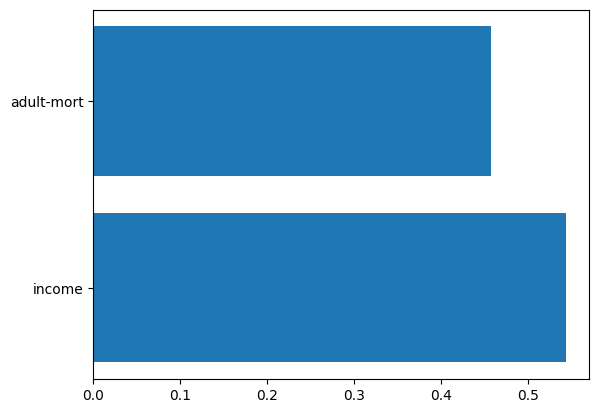

In [80]:
plt.barh(X.columns, best_model.feature_importances_)

## 9. Inference

- Test with real-world data
- You don't really know how good is your model, you just try it

In [83]:
import pickle

filename = 'model/life-expectancy-chaky.model'
pickle.dump(grid, open(filename, 'wb'))

In [84]:
#how to load model and do inference
loaded_model = pickle.load(open(filename, 'rb'))

In [90]:
df_no_country.columns

Index(['year', 'status', 'life-exp', 'adult-mort', 'infant-deaths', 'alcohol',
       'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths', 'polio',
       'total-exp', 'dip', 'hiv', 'gdp', 'pop', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

In [94]:
# df_no_country.loc[1]
#income: 0.476
#adult-mort - 271
#life exp - 59

sample = np.array([[0.476, 271.000]])

In [95]:
loaded_model.predict(sample)

array([51.33])

## 10. Deployment

- We gonna skip this, but you have at least beware that there is still a lot to do in deployment

- Deploy your model using FastAPI.  How to host your model in AWS / Azure.